# Lending Club Case Study - Exploratory Data Analysis

## Assignment Introduction

**You are working for a lon compnay. Make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='whitegrid')
import datetime

In [98]:
#Reading loan.csv file
df_loan= pd.read_csv("loan.csv", encoding="ISO-8859-1",low_memory=False)
pd.options.display.max_columns=120 # for displaying all the columns
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [99]:
df_loan.shape

(39717, 111)

In [100]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Data Cleaing:

In [101]:
#Listing all the behavioural columns
behaviour_var =  ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [102]:
# Removing the behaviour variables from analysis
df_loan = df_loan.drop(behaviour_var, axis=1)
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 90 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null obj

In [103]:
df_loan.shape

(39717, 90)

 Calcuating the null value peraceantage in the columns and dropinag all the coluns in which null values is grater than 90%

In [104]:
# percentage of missing values in each column
(round(df_loan.isnull().sum()/len(df_loan), 2)*100)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 90, dtype: float64

In [105]:
# removing the columns having more than 90% missing values
missing_columns = df_loan.columns[100*(df_loan.isnull().sum()/len(df_loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [106]:
df_loan = df_loan.drop(missing_columns, axis=1)
print(df_loan.shape)

(39717, 34)


In [107]:
df_loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [108]:
# dropping the two columns
df_loan = df_loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [109]:
# missing values in rows
df_loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

--Checking the Missing values in Rows

In [110]:
# checking whether some rows have more than 5 missing values
len(df_loan[df_loan.isnull().sum(axis=1) > 5].index)

0

In [111]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [112]:
# The column int_rate is character type, let's convert it to float
df_loan['int_rate'] = df_loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [113]:
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y') #converting into date time format
df_loan['issue_d_month'] = df_loan['issue_d'].dt.month
df_loan['issue_d_year'] = df_loan['issue_d'].dt.year

In [114]:
# Sellecing all those rows where loan status is either charged off or fully paid.
df = df_loan[df_loan['loan_status'] != 'Current']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
id                            38577 non-null int64
member_id                     38577 non-null int64
loan_amnt                     38577 non-null int64
funded_amnt                   38577 non-null int64
funded_amnt_inv               38577 non-null float64
term                          38577 non-null object
int_rate                      38577 non-null float64
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title                     36191 non-null object
emp_length                    37544 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null datetime64[ns]
loan_status                   38577 non-null object

### Data Analysis 

In [115]:
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [116]:
print("unique emp_title : %d"  % len(df.emp_title.unique()))
print("unique emp_length : %d"  % len(df.emp_length.unique()))
print("unique tax_liens : %d"  % len(df.tax_liens.unique()))

unique emp_title : 28028
unique emp_length : 12
unique tax_liens : 2


In [117]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [118]:
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]

In [119]:
df.shape

(36136, 30)

In [120]:
df.emp_length.value_counts()

10+ years    8156
2 years      4178
< 1 year     4127
3 years      3901
4 years      3266
5 years      3091
1 year       3067
6 years      2099
7 years      1663
8 years      1391
9 years      1197
Name: emp_length, dtype: int64

In [121]:
emp_length_dict = {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6,'7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10}

In [122]:
df = df.replace({"emp_length": emp_length_dict })

In [123]:
df.emp_length.value_counts()

10    8156
2     4178
0     4127
3     3901
4     3266
5     3091
1     3067
6     2099
7     1663
8     1391
9     1197
Name: emp_length, dtype: int64

In [124]:
df['term'] = df.term.apply(lambda x: x.split()[0])
df.term.value_counts()

36    27125
60     9011
Name: term, dtype: int64

In [125]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month', 'issue_d_year'],
      dtype='object')

#### Deatails of the varaiable
*	id: A unique LC assigned ID for the loan listing.
*	member_id:	A unique LC assigned Id for the borrower member.
*	loan_amnt:	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
*	funded_amnt:  The total amount committed to that loan at that point in time.
*	funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
*	term:	The number of payments on the loan. Values are in months and can be either 36 or 60.
*	int_rate:	Interest Rate on the loan
*	installment:  The monthly payment owed by the borrower if the loan originates.
*	grade:	LC assigned loan grade
* sub_grade:	LC assigned loan subgrade
* emp_title:	The job title supplied by the Borrower when applying for the loan.*
* emp_length:	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
* home_ownership:	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
* annual_inc:	Total Income
* verification_status:  Indicates if income was verified by LC, not verified, or if the income source was verified
* issue_d: The month which the loan was funded
* loan_status: Current status of the loan
* pymnt_plan:	Indicates if a payment plan has been put in place for the loan
* purpose: A category provided by the borrower for the loan request. 
* dti: Debt to Income Ration
* initial_list_status: The initial listing status of the loan. Possible values are – W, F
* policy_code: "publicly available policy_code=1
new products not publicly available policy_code=2"
* pub_rec_bankruptcies:Number of public record bankruptcies
* tax_liens:	Number of tax liens


### Univariate Analysis

In [126]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabel(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [127]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabel(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax
#plotLoanStatus(master_loan, 'loan_amnt_bin')

In [128]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [129]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabel(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (df.loc[df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabel(ax)

In [130]:
(df['grade'].value_counts(normalize=True)*100).sort_index()

A    25.650321
B    30.252380
C    20.447753
D    13.291455
E     7.009630
F     2.551472
G     0.796989
Name: grade, dtype: float64

#### Variable: loan_status
* Checing Loan Status:

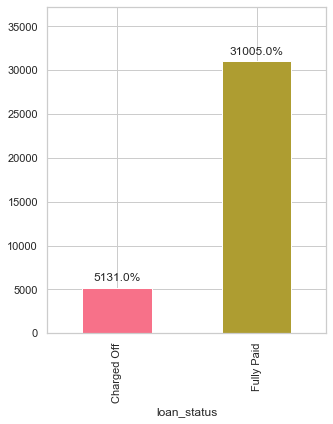

In [131]:
plt.figure(figsize=(5,6))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar(color=sns.color_palette('husl', 5))
showLabel(ax)
plt.show()

In [132]:
round(df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df['loan_status']),2)#Derived categorical variable

14.2

-->> Approximately 14% of the loans are defalted loan.

#### Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value

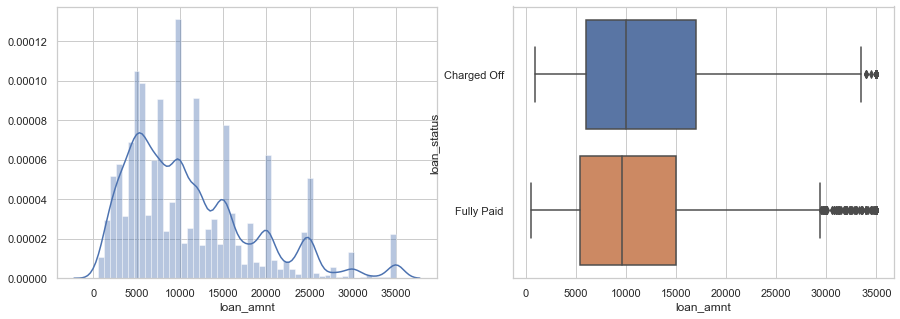

In [133]:
plot_distribution(df, 'loan_amnt')

In [134]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,12236.844670,8055.891815,900.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31005.0,10915.129818,7165.444448,500.0,5400.0,9600.0,15000.0,35000.0


###### Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000, i.e 75% vaues.
Charged off loans are shifted towards higher average loan amount request.

In [135]:
#Derived categorical variable
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

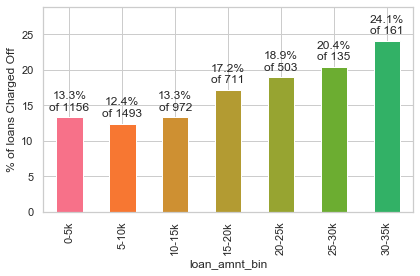

In [136]:
plotLoanStatus(df, 'loan_amnt_bin')

###### Observation:

The % of charged off loans increases as we go up the loan amount buckets. 

### Some other categorical variables distribution

In [137]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabel(ax)

    plt.tight_layout()

#### Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

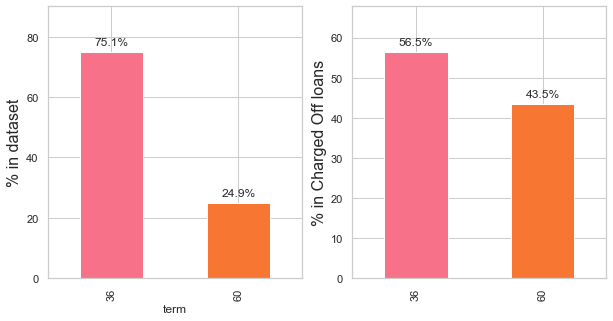

In [138]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'term')

##### Observation:

* Around ~75% of the total loans are given for duration of 3 years. while just ~25% of the loans are those given for 5 years.
* Among Charged Off loans, percentage of term 60 months rises to ~44%. The higher term loans have a higher chance of default.

#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

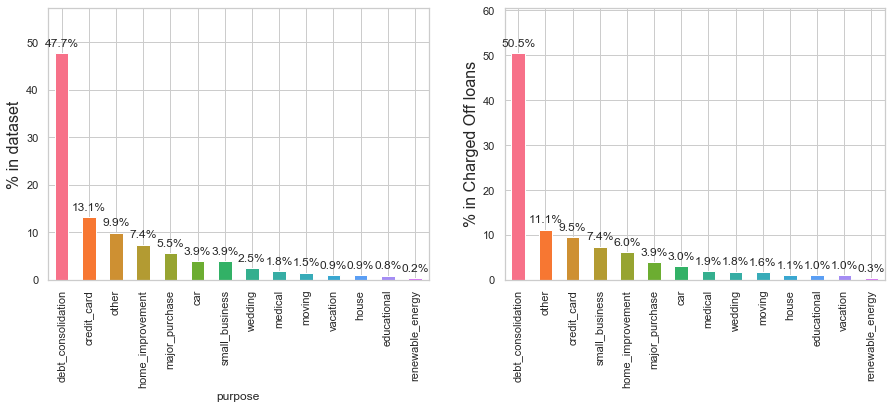

In [139]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'purpose')

##### Observation:

* The category 'small_business' percentage doubles from 3.9 to 7.4 for Charged Off loans. Let's see how the categories of this variable behave.

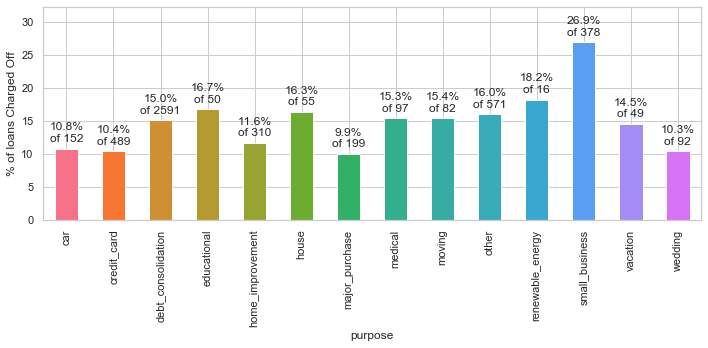

In [140]:
plt.figure(figsize=(10, 5))
plotLoanStatus(df, 'purpose')

##### Observation:

* Almost ~27% of loans for small business are Charged Off. Making them the most risky purpose.
* Approximately ~48% of the loans are issued for the purpose of dept consolidation.
* Almost ~18% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

#### Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

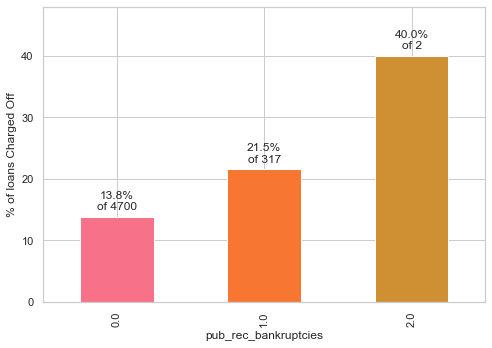

In [141]:
plt.figure(figsize=(7,5))
plotLoanStatus(df, 'pub_rec_bankruptcies')

##### Observation:

* The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

#### Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [142]:
df['int_rate'] = df['int_rate'].astype('float')
df.int_rate.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
90%         16.820000
95%         18.390000
99%         20.990000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1080x360 with 0 Axes>

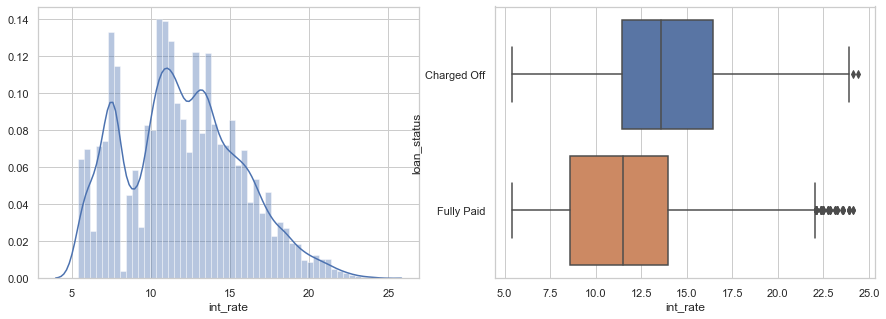

In [143]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'int_rate')

In [144]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,13.887778,3.630421,5.42,11.47,13.61,16.45,24.40
Fully Paid,31005.0,11.651134,3.596164,5.42,8.59,11.49,13.99,24.11


##### Observation:

* Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
* The intrest rate for Charged Off loans appear to be higher than for Fully paid. As, the risk increases the rate of interest imposed on the loan also increases.

#### Variable: installment
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

<Figure size 1080x360 with 0 Axes>

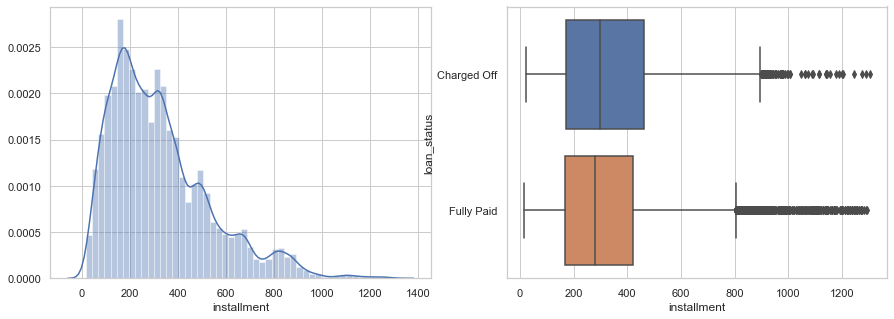

In [145]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'installment')

In [146]:
df.grade.value_counts()

B    10932
A     9269
C     7389
D     4803
E     2533
F      922
G      288
Name: grade, dtype: int64

In [147]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,339.194040,215.844671,22.79,171.54,298.33,461.44,1305.19
Fully Paid,31005.0,321.254149,205.676727,16.08,166.94,278.00,421.74,1295.21


##### Observation:

* loans Charged Off have high installment on average

#### Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

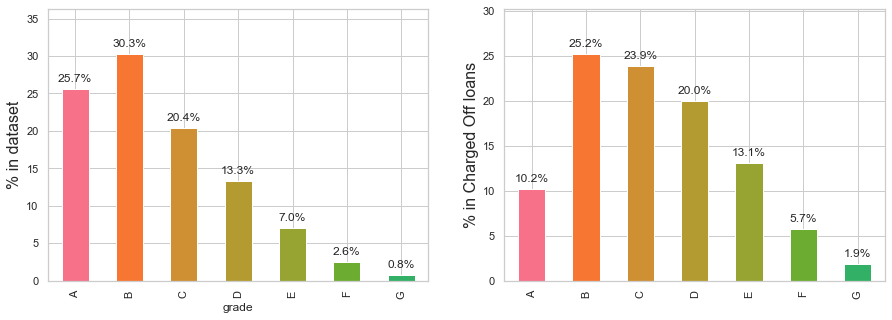

In [148]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'grade', True)

##### Observation:

* Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
* Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category

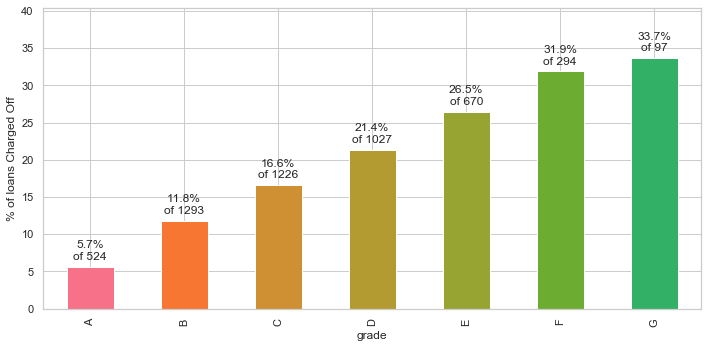

In [149]:
plt.figure(figsize=(10,5))
plotLoanStatus(df, 'grade')

##### Observation:

* Nearly 30% of all loans in Grades F and G see a default.
* Grade D and E onwards are risky, and less numerous.

#### Variable: emp_title
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [150]:
top10_emp_title = df.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Wells Fargo           52
UPS                   52
USAF                  51
US Air Force          51
Walmart               45
Name: emp_title, dtype: int64

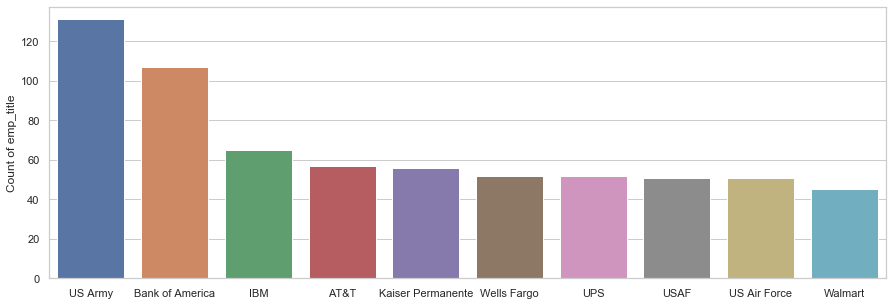

In [151]:
plt.figure(figsize=(15,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

##### Observation:

* Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
* Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
* The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates

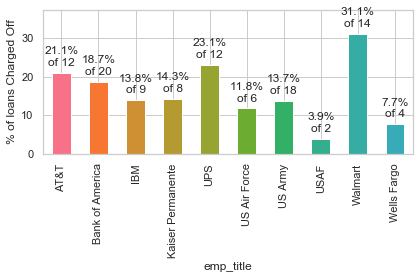

In [152]:
plotLoanStatus(df[df['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

##### Observation:

* Max number of defaulters are employees of walmart. Above 30% of the people working in walmart are defaulters
* In wells frago and USAF. the numbers per employer are quite low, and this unlikely to have an impact on default rates.

#### Variable: emp_length
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [153]:
df.emp_length.value_counts(normalize=True)

10    0.225703
2     0.115619
0     0.114207
3     0.107953
4     0.090381
5     0.085538
1     0.084874
6     0.058086
7     0.046021
8     0.038493
9     0.033125
Name: emp_length, dtype: float64

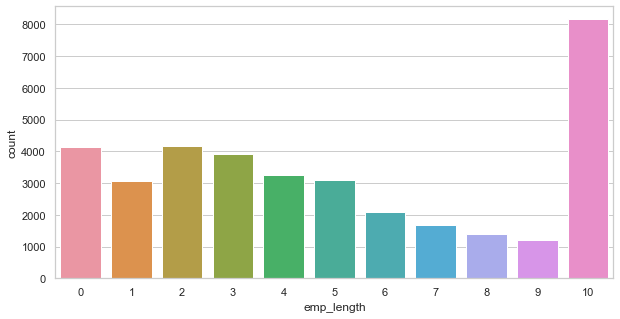

In [154]:
plt.figure(figsize=(10,5))
sns.countplot(df['emp_length'], order=sorted(df.emp_length.unique()))
plt.show()

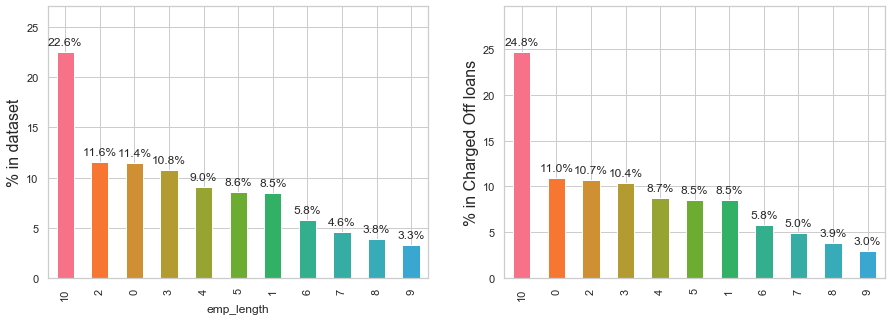

In [155]:
plt.figure(figsize=(15, 5))
plot_percentages(df, 'emp_length')

##### Observation:

* 22.6% of the of loan taker have an employment length of more than 10 years.
* There is no impact of employment length to chance of loan default

#### Variable: home_ownership
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

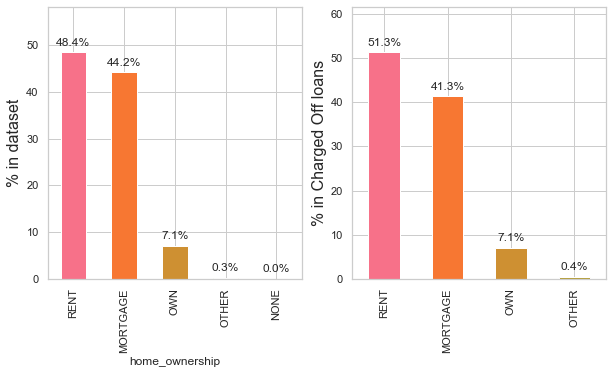

In [156]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'home_ownership')

##### Observation:
    
* There is no impact on loan status due to home ownership

#### Variable: annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [157]:
df.annual_inc.describe()

count    3.613600e+04
mean     6.903275e+04
std      6.462191e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

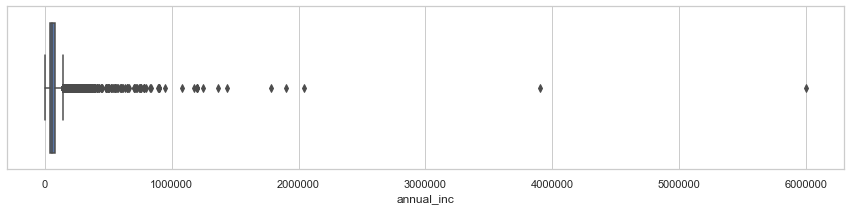

In [158]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=df['annual_inc'], data=df)

##### Observation:
The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000). 
Median annual income is around 60,000 
Most people have an annual income less than 115000

In [159]:
df1 = df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]
df1.annual_inc.describe()

count     35884.000000
mean      66124.563525
std       35801.611753
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       81228.000000
max      262000.000000
Name: annual_inc, dtype: float64

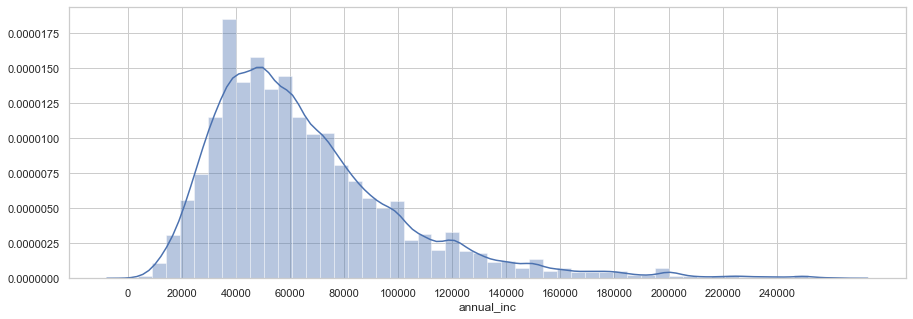

In [160]:
plt.figure(figsize=(15, 5))
sns.distplot(df1['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

##### Observation:

* 10000 seems to be a good bin size to further analyze income as categories

In [161]:
#Create Derived categorical variable
df['income_bin'] =df['annual_inc']/20000
df['income_bin'] = df['income_bin'].astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

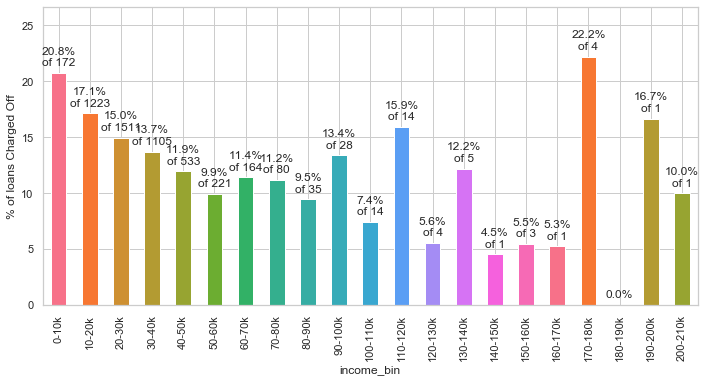

In [162]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(df.loc[df['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

##### Observation:

* Default Loans are higher for lower income, and progressively reduce as incomes go up.
* It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

#### Variable - verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [163]:
df.verification_status.value_counts()

Not Verified       15553
Verified           11391
Source Verified     9192
Name: verification_status, dtype: int64

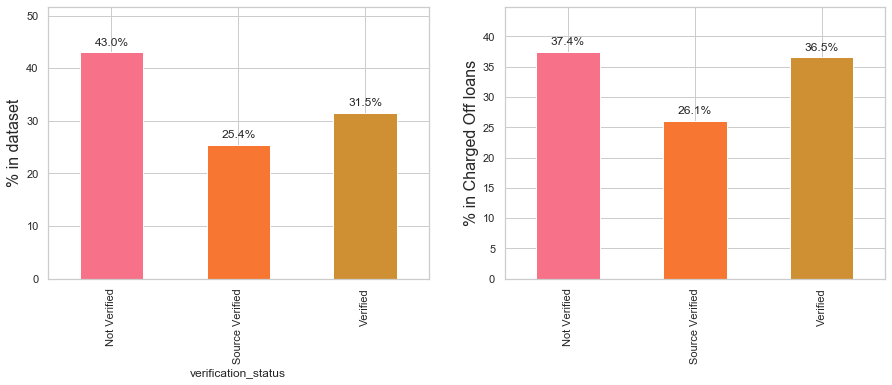

In [164]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'verification_status', True)

##### Observation:

* Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
* Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis

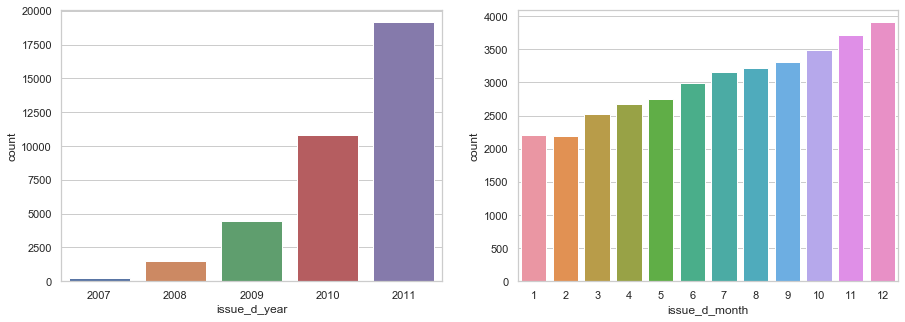

In [165]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(df['issue_d_year'], order=sorted(df.issue_d_year.unique()))

plt.subplot(1, 2, 2)
sns.countplot(df['issue_d_month'], order=sorted(df.issue_d_month.unique()))

plt.show()

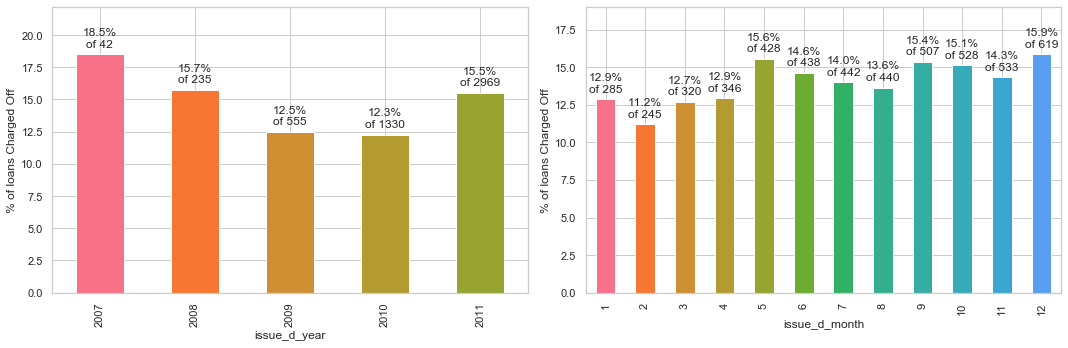

In [166]:
#Fraction of loans charged off and fully Paid
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plotLoanStatus(df, 'issue_d_year')

plt.subplot(1, 2, 2)
plotLoanStatus(df, 'issue_d_month')

plt.show()

##### **Observation:**
-  Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year? 
-  Year of loan has no significant effect on likelihood of default. 
-  Month of loan is spread out and has no significant effect on likelihood of default.

#### Variable: dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [167]:
df.dti.describe()

count    36136.000000
mean        13.353784
std          6.646847
min          0.000000
25%          8.250000
50%         13.460000
75%         18.610000
max         29.990000
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

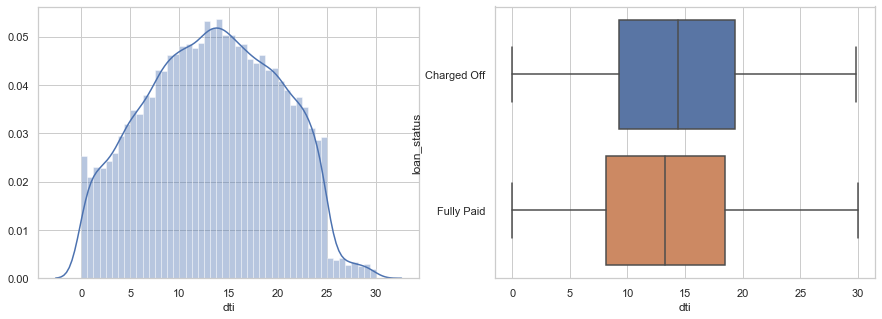

In [168]:
plt.figure(figsize=(10,5))
plot_distribution(df, 'dti')

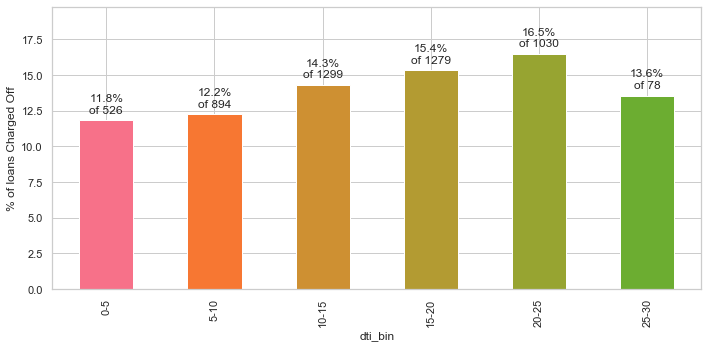

In [169]:
# Create derived variable 
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

plt.figure(figsize=(10,5))
plotLoanStatus(df, 'dti_bin')

##### **Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

### Derived variable - ratio of loan amount to annual income 

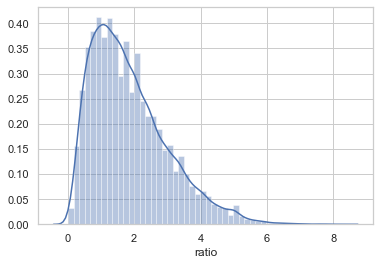

In [170]:
df['ratio'] = df['loan_amnt'] * 10 / df['annual_inc']
sns.distplot(df['ratio'])

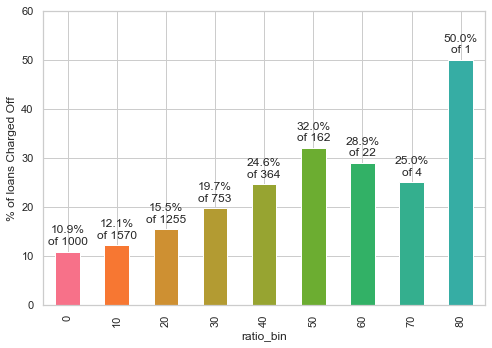

In [171]:
df['ratio_bin'] = (df['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(df, 'ratio_bin')

##### **Observation:**
-  As long as loan amount is less than 20% of annual income, defaults are low. 
- Loan amounts of 30% of annual income or higher see a high rate of default.

### Bivariate Analysis

#### loan_amnt over time

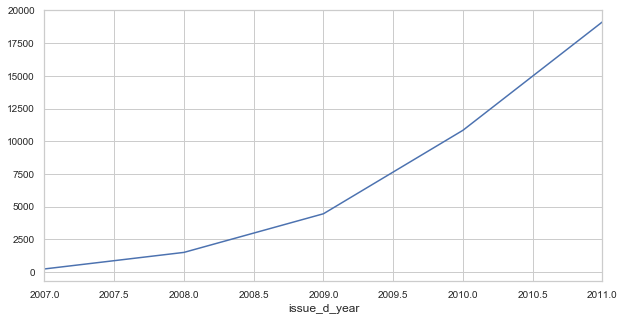

In [172]:
plt.figure(figsize=(10,5))
#plt.subplot(1, 2, 1)
df.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=10)
plt.show()

####  loan_amnt and annual_inc

<Figure size 720x360 with 0 Axes>

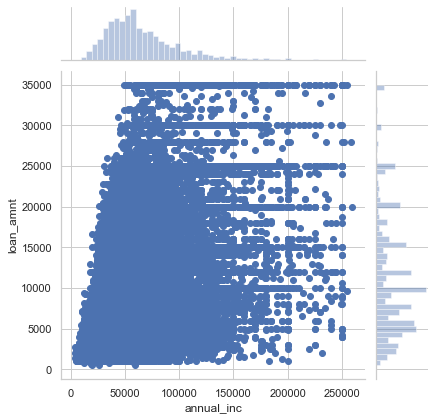

In [173]:
plt.figure(figsize=(10,5))
sns.jointplot('annual_inc', 'loan_amnt', df.loc[df['annual_inc']<260000])
plt.show()

##### **Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

### loan_amnt vs grade

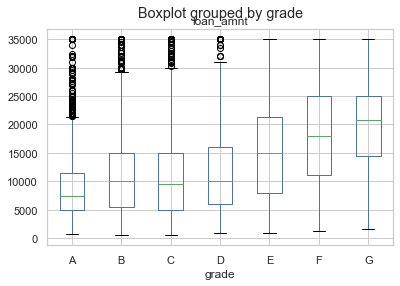

In [174]:
df.boxplot(column='loan_amnt', by='grade')
plt.show()

##### Observation:
-  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

#### annual income with grade

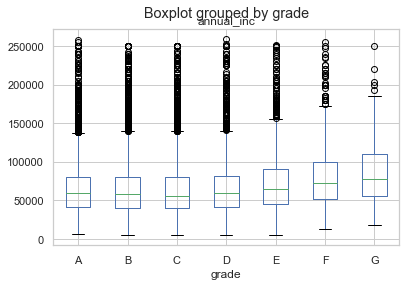

In [175]:
df.loc[df['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

#### loan_amnt vs verification_status vs loan status

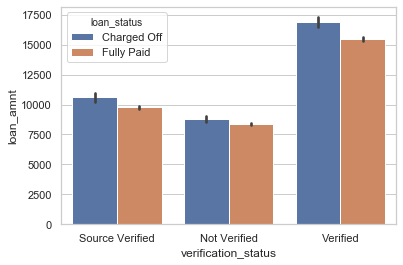

In [176]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)

##### **Observation:**
- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

#### Interest Rate and Term

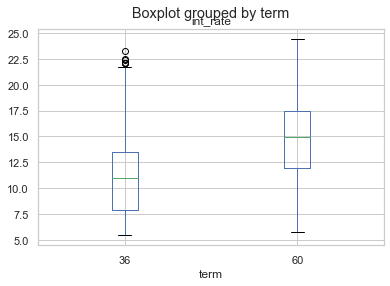

In [177]:
#master_loan.groupby('term').int_rate.mean().plot(kind='bar')
df.boxplot(column='int_rate', by='term')
plt.show()

##### **Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

#### Interest Rate and Grade

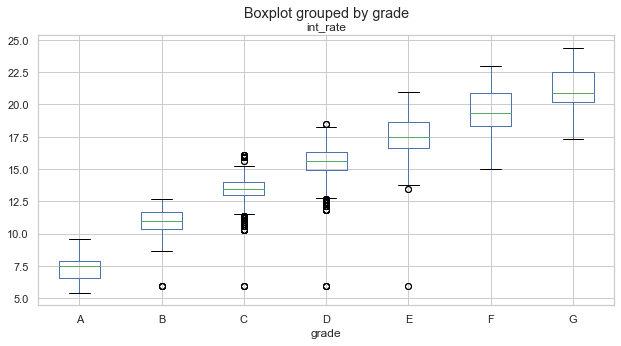

In [178]:
df.boxplot(column='int_rate', by='grade',figsize=(10,5))
plt.show()

##### **Observation:**
-  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

#### Interest Rate and Sub Grade

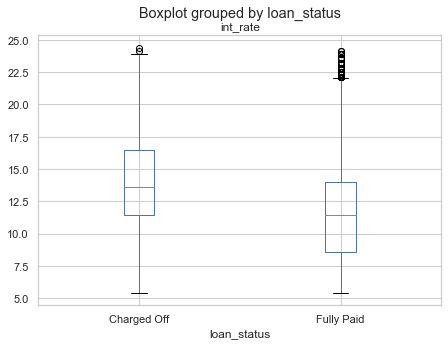

In [179]:
df.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

##### **Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

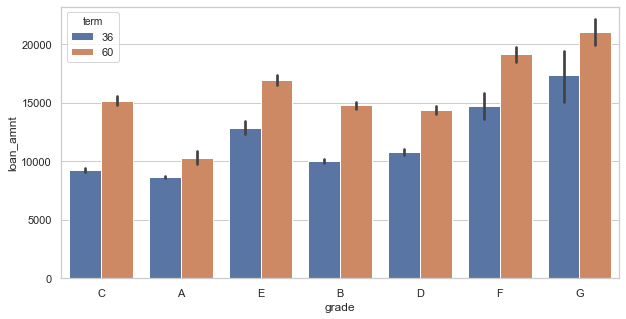

In [180]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

##### **Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status

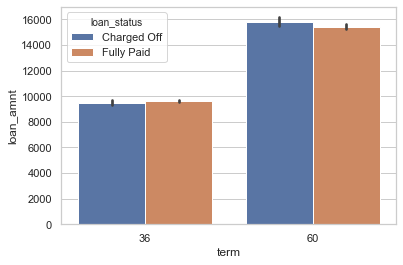

In [181]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

##### **Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


#### Loan amount Vs grade vs loan Status

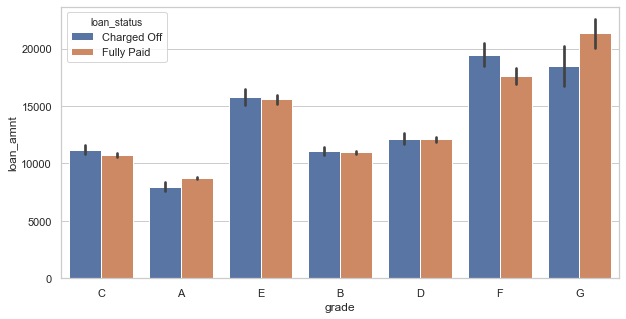

In [182]:
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

#### **Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for every loan statu.

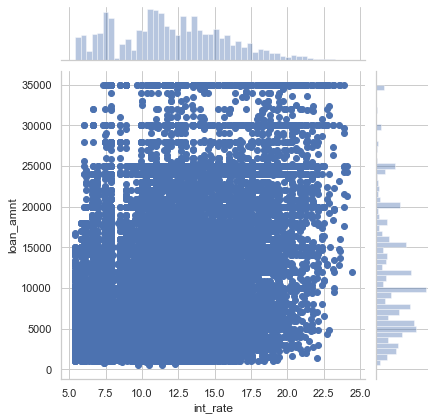

In [183]:
sns.jointplot('int_rate', 'loan_amnt', df)

In [184]:
df['dti_bin']
df.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.067160
5-10     11.575201
10-15    12.024781
15-20    12.396439
20-25    12.654169
25-30     9.624904
Name: int_rate, dtype: float64

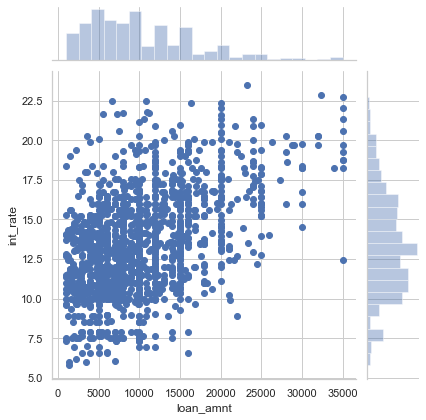

In [185]:
sns.jointplot('loan_amnt', 'int_rate', df.loc[df.pub_rec_bankruptcies > 0])

### Correlations:

In [186]:
corr=df.corr()
corr['loan_amnt']

id                            0.123246
member_id                     0.123398
loan_amnt                     1.000000
funded_amnt                   0.981602
funded_amnt_inv               0.936210
int_rate                      0.298697
installment                   0.931293
emp_length                    0.144615
annual_inc                    0.255517
dti                           0.063912
collections_12_mths_ex_med         NaN
policy_code                        NaN
acc_now_delinq                     NaN
chargeoff_within_12_mths           NaN
delinq_amnt                        NaN
pub_rec_bankruptcies         -0.030693
tax_liens                          NaN
issue_d_month                 0.050853
issue_d_year                  0.113785
income_bin                    0.256846
ratio                         0.615203
ratio_bin                     0.595413
Name: loan_amnt, dtype: float64

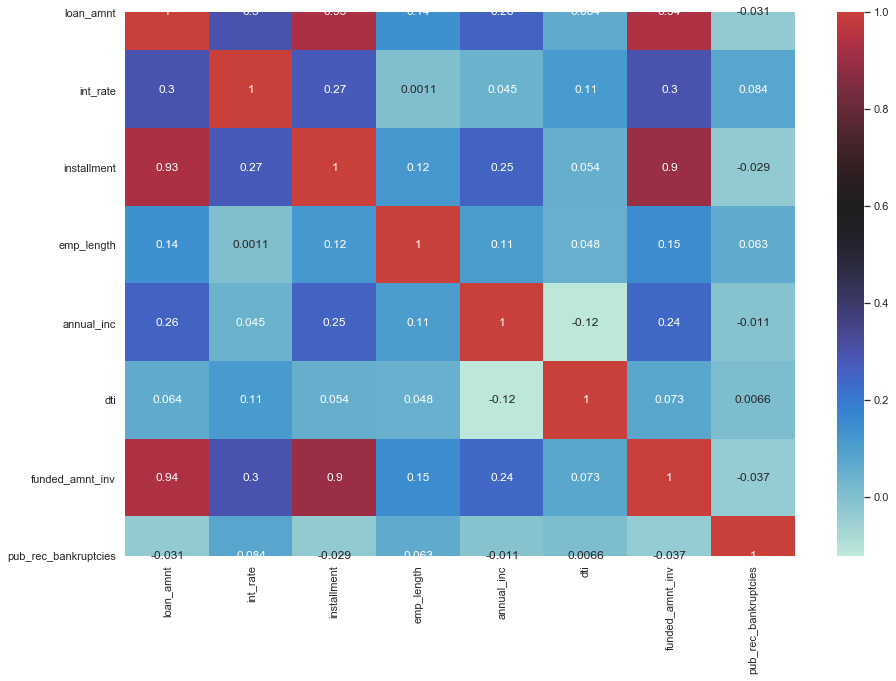

In [187]:
plt.figure(figsize=(15,10))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti','term','loan_status','funded_amnt_inv','pub_rec_bankruptcies']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.6)

#### Observation:
- loan_amnt is highy correlated to funded_amnt_inv and installment with r factor of .94 and .93 respectively. as expected
- As expected installment is correlated with loan_amnt and funded_amnt_inv which is good, as company is charging higher interest from riskier loan.

##### Observation:
- For loan below 20K the interest rate is ve between 10 to 17.5.